In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 4000
import matplotlib.pyplot as plt

# Plugin to help us display the HTML files that we saved. 
import IPython

# For our sentiment analysis
from textblob import TextBlob

In [3]:
import IPython
IPython.display.HTML(filename='/content/drive/MyDrive/gensim_lda+_viz_19.html')

In [4]:
IPython.display.HTML(filename='/content/drive/MyDrive/sk_lda+_viz_20.html')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/labeled_data_gensim_LDA_19.csv')

In [6]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Source
0,0,11.0,0.5957,"said, one, time, like, day, say, peopl, work, ...",The Dearborn-based automaker chose Tennessee f...,Bridgemi
1,1,18.0,0.7195,"said, say, peopl, year, like, get, time, n’t, ...","From a purely geographic perspective, most of ...",Bridgemi
2,2,2.0,0.6391,"say, said, time, year, peopl, vaccin, first, l...",“The focus of the last election is always goin...,Bridgemi
3,3,10.0,0.5751,"said, say, peopl, year, also, vaccin, one, mak...","Marquette, Ottawa, Washtenaw and Kent county h...",Bridgemi
4,4,10.0,0.6205,"said, say, peopl, year, also, vaccin, one, mak...","The finalized legislation, brokered by Whitmer...",Bridgemi


In [7]:
sentiment_score_list = [round(TextBlob(article).sentiment.polarity, 3) for article in df['Text']]
#Getting our subjectivity score
sentiment_subjectivity_list = [round(TextBlob(article).sentiment.subjectivity, 3) for article in df['Text']]

In [8]:
df_ss = pd.DataFrame([list(df['Dominant_Topic']), sentiment_score_list]).T
df_ss.columns= ['Topic','Sentiment Score']
df_ss['Source'] = df['Source']
df_ss['Keywords'] = df['Keywords']

In [9]:
df_subjectivity = pd.DataFrame([list(df['Dominant_Topic']), sentiment_subjectivity_list]).T
df_subjectivity.columns = ['Topic', 'Subjectivity Score']

df_ss['Subjectivity Score'] = df_subjectivity['Subjectivity Score']

In [10]:
df_ss.head()

,Topic,Sentiment Score,Source,Keywords,Subjectivity Score
0,11.0,0.096,Bridgemi,"said, one, time, like, day, say, peopl, work, ...",0.346
1,18.0,0.103,Bridgemi,"said, say, peopl, year, like, get, time, n’t, ...",0.393
2,2.0,0.071,Bridgemi,"say, said, time, year, peopl, vaccin, first, l...",0.442
3,10.0,0.039,Bridgemi,"said, say, peopl, year, also, vaccin, one, mak...",0.312
4,10.0,0.128,Bridgemi,"said, say, peopl, year, also, vaccin, one, mak...",0.377


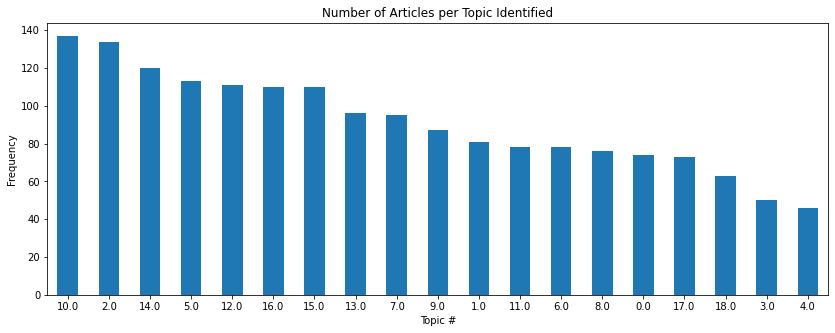

In [11]:
plt.figure(figsize=(14, 5))
ax = df_ss['Topic'].value_counts().plot(kind='bar',
                                    title="Number of Articles per Topic Identified")                                    
ax.set_xlabel("Topic #")
plt.xticks(rotation=0)
ax.set_ylabel("Frequency")
plt.show()

In [12]:
df_ss.to_csv('/content/drive/MyDrive/labeled_data_gensim_LDA_19_with_ss.csv')

In [13]:
(df_ss.groupby(['Topic'])).mean().groupby('Topic')['Sentiment Score'].mean()

Topic
0.0     0.111365
1.0     0.097222
2.0     0.109657
3.0     0.137460
4.0     0.120674
5.0     0.114619
6.0     0.089962
7.0     0.085547
8.0     0.096342
9.0     0.120782
10.0    0.098044
11.0    0.116397
12.0    0.133171
13.0    0.094125
14.0    0.079925
15.0    0.120918
16.0    0.113045
17.0    0.097466
18.0    0.108794
Name: Sentiment Score, dtype: float64

In [14]:
df_ss.groupby(['Source', 'Topic']).mean()

Sentiment Score  Subjectivity Score
Source          Topic                                     
BBC             0.0          -0.010333            0.244667
                1.0           0.123400            0.612600
                2.0           0.088417            0.342583
                3.0           0.200286            0.380143
                4.0           0.115000            0.133000
                5.0           0.083818            0.365091
                6.0           0.044667            0.439667
                7.0           0.111857            0.443000
                8.0           0.002400            0.195600
                9.0           0.146400            0.378000
                10.0          0.070333            0.285222
                11.0          0.179818            0.393455
                12.0          0.109818            0.492727
                13.0          0.050000            0.516667
                14.0          0.063667            0.377667
                15.0          0.136182            0.370636
                16.0          0.046333            0.233833
                17.0          0.103333            0.325500
                18.0          0.100875            0.302500
Bridgemi        0.0           0.046000            0.354000
                2.0           0.100250            0.400000
                5.0           0.094500            0.426500
                6.0           0.048000            0.394000
                7.0           0.075000            0.357000
                8.0           0.146000            0.413333
                10.0          0.073333            0.330333
                11.0          0.115400            0.418400
                12.0          0.162000            0.442000
                13.0          0.157500            0.392000
                14.0          0.054000            0.465000
                15.0          0.185000            0.412000
                18.0          0.103000            0.393000
CBC             0.0           0.152000            0.485000
                1.0           0.090900            0.449400
                2.0           0.151944            0.416056
                3.0           0.116000            0.436667
                4.0           0.068000            0.445000
                5.0           0.124118            0.448235
                6.0           0.056111            0.342333
                7.0           0.065200            0.382000
                8.0          -0.030000            0.383500
                9.0           0.121000            0.380250
                10.0          0.111167            0.437167
                11.0          0.140500            0.478000
                12.0          0.129333            0.469833
                13.0          0.110500            0.489000
                14.0          0.087000            0.396889
                15.0          0.065429            0.416857
                16.0          0.130400            0.421600
                17.0          0.093000            0.570333
                18.0          0.111000            0.411250
CNN             0.0           0.157800            0.439000
                1.0           0.084636            0.444091
                2.0           0.115538            0.448205
                3.0           0.173500            0.444667
                4.0           0.171800            0.497400
                5.0           0.126250            0.475750
                6.0           0.094000            0.436000
                7.0           0.096903            0.427516
                8.0           0.189231            0.444923
                9.0           0.153333            0.433533
                10.0          0.144077            0.394923
                11.0          0.098667            0.399778
                12.0          0.143333            0.426556
                13.0          0.124133            0.428933
                14.0          0.134625            0.435562
           